# Graphs based on Portifolio results

In [1]:
import pandas as pd

path = "../results/bestPortfolios.csv"

records = []
with open(path, "r") as f:
    for line in f.read().splitlines():
        entry = {}
        for token in line.split(";"):
            if not token: 
                continue
            key, val = token.split("=")
            key = key.strip()
            num = val.strip().replace(",", ".").rstrip("%")
            entry[key] = float(num)
        records.append(entry)

df = pd.DataFrame(records)
df.head()


,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,NKE,NVDA,PG,SHW,Sharpe,TRV,UNH,V,VZ,WMT
0,0.4,2.4,2.2,6.3,3.6,3.3,17.1,11.4,1.1,5.8,...,1.5,0.8,12.8,0.1,2.443,NaN,NaN,NaN,NaN,NaN
1,15.9,0.6,2.2,3.7,4.6,1.4,9.6,2.5,0.4,0.1,...,1.2,0.8,1.0,NaN,2.451,12.4,NaN,NaN,NaN,NaN
2,4.4,1.6,13.4,1.7,0.5,4.5,6.5,7.8,1.4,7.2,...,0.6,1.2,11.0,NaN,2.460,NaN,2.6,NaN,NaN,NaN
3,10.2,1.9,1.2,0.3,1.8,6.1,10.6,3.5,0.4,0.8,...,6.1,4.2,4.3,NaN,2.541,NaN,NaN,13.4,NaN,NaN
4,1.1,0.5,5.3,1.0,2.0,2.2,13.4,8.1,2.1,14.1,...,0.6,3.9,0.1,NaN,2.552,NaN,NaN,NaN,3.4,NaN


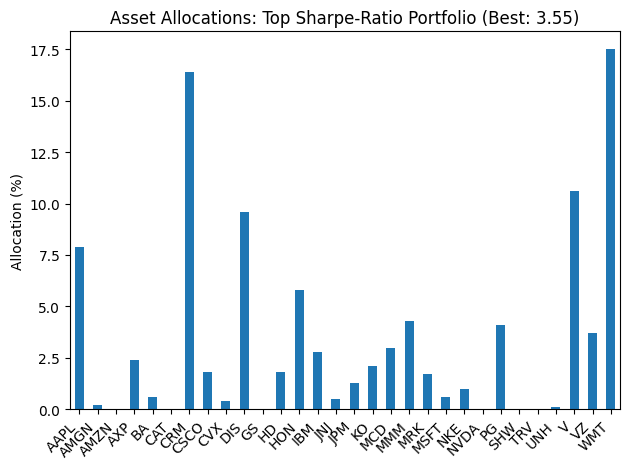

In [2]:
# Cell 2: Bar chart of weights for the single best‐Sharpe portfolio
import matplotlib.pyplot as plt

best = df.nlargest(1, "Sharpe").iloc[0]
weights = best.drop("Sharpe")

plt.figure()
weights.plot(kind="bar")
plt.title(f"Asset Allocations: Top Sharpe-Ratio Portfolio (Best: {best.Sharpe:.2f})")
plt.ylabel("Allocation (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


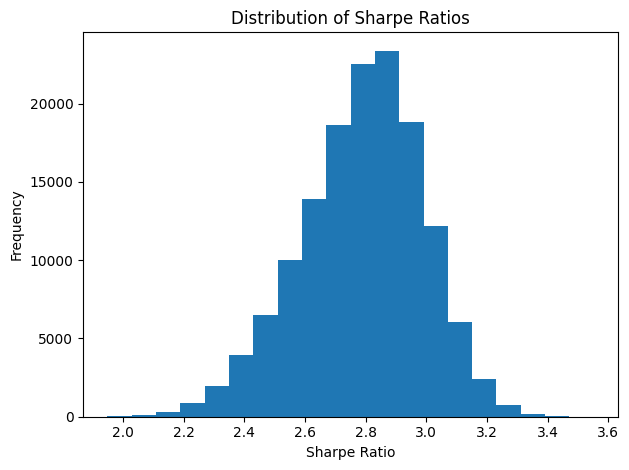

In [3]:
# Cell 3: Histogram of Sharpe ratios across all saved portfolios
plt.figure()
df["Sharpe"].plot(kind="hist", bins=20)
plt.title("Distribution of Sharpe Ratios")
plt.xlabel("Sharpe Ratio")
plt.tight_layout()
plt.show()
